# Regression

<b>Import Libraries</b>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## EDA

In [3]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('kc_house_data.csv')
space=dataset[['sqft_living']]
price=dataset[['price']]

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: >

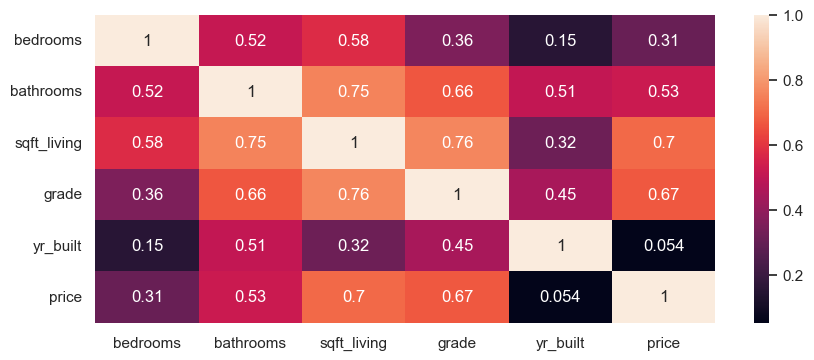

In [5]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(dataset[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built','price']].corr(), annot=True)

<b>Pair Plot</b>

C:\Users\mthes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

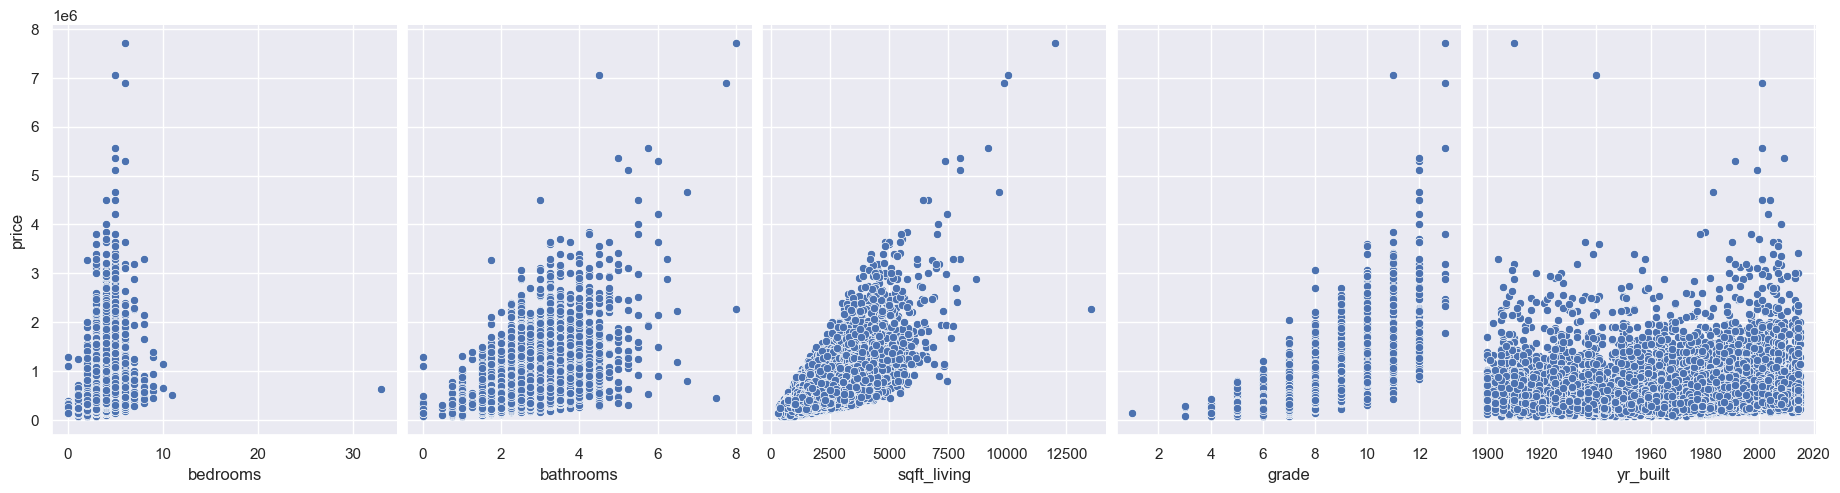

In [6]:
plt.figure(figsize=(10,8))
sns.pairplot(data=dataset, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)

## Preprocessing

In [7]:
df_pre = dataset.copy()

Q1 = df_pre['price'].quantile(0.25)
Q3 = df_pre['price'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_pre['price'] >= low_limit) & (df_pre['price'] <= high_limit))
df_pre = df_pre[filtered_entries]

In [12]:
features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

for var in features:
    df_pre[var]= (dataset[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df_pre[var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [13]:
df_pre.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,0.393123,0.323891,0.431438,0.295712,0.0,0.0,0.0,...,0.740620,0.470566,0.000000,0.485594,0.000000,98178,47.5112,-122.257,0.465421,0.300037
1,6414100192,20141209T000000,538000.0,0.393123,0.550756,0.671039,0.326501,0.5,0.0,0.0,...,0.740620,0.675088,0.757889,0.450741,0.998426,98125,47.7210,-122.319,0.554644,0.341935
2,5631500400,20150225T000000,180000.0,0.311543,0.323891,0.300100,0.366525,0.0,0.0,0.0,...,0.669282,0.327317,0.000000,0.293015,0.000000,98028,47.7379,-122.233,0.737656,0.349422
3,2487200875,20141209T000000,604000.0,0.456402,0.647781,0.587621,0.280554,0.0,0.0,0.0,...,0.740620,0.431390,0.861645,0.572415,0.000000,98136,47.5208,-122.393,0.471117,0.283060
4,1954400510,20150218T000000,510000.0,0.393123,0.513354,0.540169,0.340082,0.0,0.0,0.0,...,0.803545,0.589158,0.000000,0.761877,0.000000,98074,47.6168,-122.045,0.578891,0.339440


## Split Train & Test

In [14]:
x = df_pre.drop(columns=['price','id','date']) # menggunakan semua feature kecuali target
y = df_pre['price']

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42) #Splitting the data into Train and Test

## Fit Model Simple Linear Regression
Fitting Model to Train Set


In [16]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict
Predict the Test Set

In [17]:
pred = regressor.predict(xtest) #Predicting the prices

## Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [19]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-2.35952156e+05  1.24123514e+05  1.76349485e+05  8.53782119e+04
  6.06885429e+04  1.56861616e+05  1.10401389e+05  1.24032583e+05
  1.13534986e+06  2.89475510e+05  4.93870040e+04 -2.18382639e+05
  2.18790663e+04 -2.27812921e+02  5.41237204e+05 -1.45692051e+04
  2.78917574e+05 -1.38906455e+05]
Intercept: 
 -5939009.713413395
MAE: 89160.90
RMSE: 117102.67
R2 score: 0.67


Coefficient could be interpret as feature importance in linear regression

In [20]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.6860354207667312
test Accuracy :  0.6732150874295988
